In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [9]:
fashion_mnist = keras.datasets.fashion_mnist   

In [10]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
print(X_train.shape)

(60000, 28, 28)


In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\Pranav\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8251 - loss: 0.5009
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8655 - loss: 0.3742
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8861 - loss: 0.3129
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8915 - loss: 0.2951


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8721 - loss: 0.3431
Test accuracy: 0.8720999956130981


In [18]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


In [17]:
import matplotlib.pyplot as plt


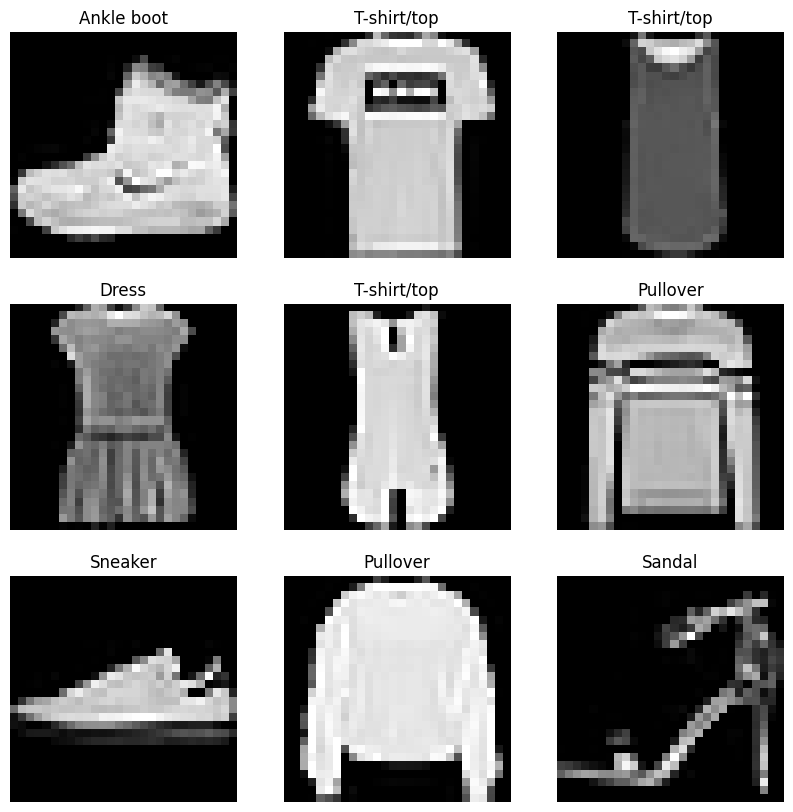

In [19]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


In [20]:
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


In [22]:
import numpy as np

predicted_class = np.argmax(predictions[0])
print("Predicted:", class_names[predicted_class])
print("Actual:", class_names[y_test[0]])




Predicted: Ankle boot
Actual: Ankle boot


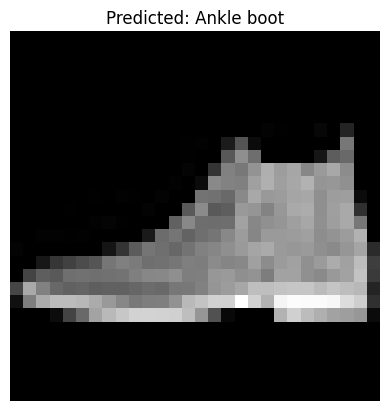

In [23]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
